In [20]:
import pandas as pd

In [21]:
df=pd.read_excel("Patients_features.xlsx",sheet_name="Clinical_features")

In [22]:
df = df[df.columns[df.nunique() != 1]]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6244.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6, cost: 6244.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 224, cost: 6244.0
Run 3, iteration: 2/100, moves: 0, cost: 6244.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1121, cost: 5996.0
Run 4, iteration: 2/100, moves: 217, cost: 5996.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 9, cost: 6986.0
Best run was number 4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 846, cost: 5690.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, 

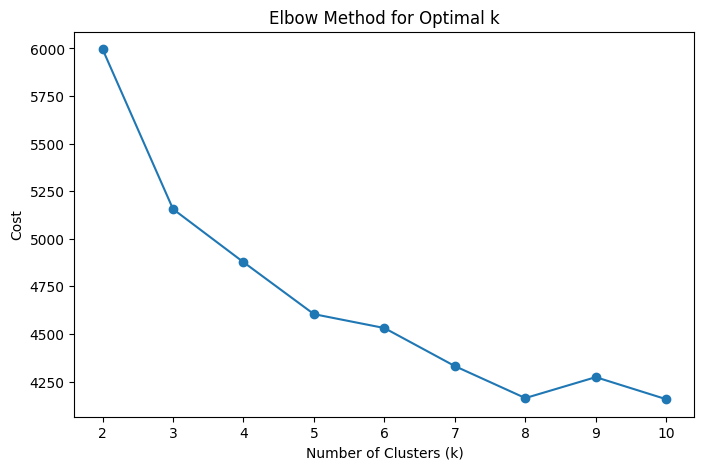

In [23]:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

# Initialize an empty list to store the cost for each k
cost = []

# Define the range of clusters to evaluate
K = range(2, 11)  # Example: Evaluate k from 2 to 10

# Iterate through the range of k values
for k in K:
    # Initialize the KModes model with the current k
    k_modes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
    
    # Fit the model and calculate the cost
    k_modes.fit(df.iloc[:, 1:])
    cost.append(k_modes.cost_)

# Plot the cost vs. the number of clusters to find the "elbow point"
plt.figure(figsize=(8, 5))
plt.plot(K, cost, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k')
plt.show()

# Select the optimal k based on the elbow point


In [30]:

k_modes_optimal = KModes(n_clusters=6, init='Huang', n_init=5, verbose=1)
clusters = k_modes_optimal.fit_predict(df.iloc[:, 1:])

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 725, cost: 5801.0
Run 1, iteration: 2/100, moves: 241, cost: 4829.0
Run 1, iteration: 3/100, moves: 247, cost: 4829.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 412, cost: 5167.0
Run 2, iteration: 2/100, moves: 125, cost: 5145.0
Run 2, iteration: 3/100, moves: 0, cost: 5145.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 361, cost: 4568.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 456, cost: 4491.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 154, cost: 5652.0
Best run was number 4


In [31]:
df['Cluster'].value_counts()

Cluster
0    611
3    518
4    515
1    386
2    294
5    113
Name: count, dtype: int64

In [13]:
df.columns

Index(['person_id', 'T1D', 'T2D', 'LIVER_MILD', 'LIVER', 'AIDS', 'MALIG',
       'METAS', 'DIAB_CHRO', 'DEMENTIA', 'CEREBRO', 'CHF', 'RENAL', 'MYOC',
       'PVD', 'COPD', 'PEPTIC', 'RHEUM', 'Morbid_Obesity', 'obesity', 'CKD',
       'Sepsis', 'Osteomyelitis', 'Respiratory_failure', 'atrial_fibrillation',
       'Depression_disorder', 'Thrombocytopathy', 'Sacroiliitis',
       'Cerebral_infarction', 'Ulcer', 'Coleractral_cancer', 'Lung_Cancer',
       'Stomach_Cancer', 'Stroke', 'Hypertension', 'Hyperlipidemia',
       'osteoarthritis', 'Limb amputation', 'Appendix surgery',
       'AV shunt for dialysis ', 'Breast surgery', 'Gallbladder surgery',
       'Spinal fusion', 'Open reduction of fracture', 'Herniorrhaphy',
       'Hip prosthesis', 'Abdominal hysterectomy', 'Knee prosthesis',
       'Laminectomy', 'Kidney surgery', 'Ovarian surgery', 'Pacemaker surgery',
       'Peripheral vascular bypass surgery', 'Exploratory laparotomy',
       'Cluster'],
      dtype='object')

In [32]:
df.to_csv("patietn_clusters_6c.csv")

In [33]:
melted = df.melt(id_vars=['person_id', 'Cluster'], var_name='feature', value_name='value')

# Filter rows where value == 1
filtered = melted[melted['value'] == 1]

# Group by Cluster and feature, count distinct person_id
result = filtered.groupby(['feature', 'Cluster'])['person_id'].nunique().unstack(fill_value=0)


In [34]:
result

Cluster,0,1,2,3,4,5
feature,,,,,,
AIDS,0,0,0,2,0,1
AV shunt for dialysis,1,1,2,0,0,1
Abdominal hysterectomy,0,0,1,0,0,0
Appendix surgery,1,0,1,1,0,0
Breast surgery,0,0,0,1,1,0
CEREBRO,10,19,19,43,1,12
CHF,4,20,19,16,3,7
CKD,37,101,278,0,17,0
COPD,29,63,42,95,9,34


In [19]:
melted = df.melt(id_vars=['person_id', 'Cluster'], var_name='feature', value_name='value')

# Filter rows where value == 1
filtered = melted[melted['value'] == 1]

# Calculate the numerator: distinct person_id counts per feature and cluster
numerator = filtered.groupby(['feature', 'Cluster'])['person_id'].nunique()

# Calculate the denominator: distinct person_id counts per feature across all clusters
denominator = filtered.groupby('feature')['person_id'].nunique()

# Compute percentage (divide numerator by denominator)
percentage = (numerator / denominator).unstack(fill_value=0) * 100


In [20]:
percentage

Cluster,0,1,2
feature,,,
AIDS,33.333333,0.000000,66.666667
AV shunt for dialysis,0.000000,20.000000,80.000000
Abdominal hysterectomy,100.000000,0.000000,0.000000
Appendix surgery,33.333333,0.000000,66.666667
Breast surgery,0.000000,0.000000,100.000000
CEREBRO,19.230769,10.576923,70.192308
CHF,26.086957,17.391304,56.521739
CKD,20.323326,14.318707,65.357968
COPD,21.323529,12.500000,66.176471


In [76]:
import pandas as pd
SDOH=pd.read_excel("Patients_features.xlsx",sheet_name="SDOH")

In [77]:
SDOH.columns

Index(['person_id', 'ethnicity_source_value', 'Race', 'gender_source_value',
       'Smoking', 'Alcohol', 'Location_area'],
      dtype='object')

In [74]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
from sklearn.preprocessing import OneHotEncoder

def categorical_kmodes_clustering(data, n_clusters=3):
    # Preserve person_id
    person_id = data['person_id']
    
    # Select categorical columns for clustering
    cat_columns = ['ethnicity_source_value', 'Race', 'gender_source_value', 
                   'Smoking', 'Alcohol', 'Location_area']
    
    # One-hot encoding
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_data = encoder.fit_transform(data[cat_columns])
    
    # Apply KModes clustering
    kmodes = KModes(n_clusters=n_clusters, random_state=42)
    clusters = kmodes.fit_predict(encoded_data)
    
    # Add cluster labels to original dataframe
    result_df = data.copy()
    result_df['Cluster'] = clusters
    result_df['person_id'] = person_id
    
    return result_df, kmodes.cluster_centroids_

# Example usage
result, centroids = categorical_kmodes_clustering(SDOH,6)

In [75]:
result["Cluster"].value_counts()

Cluster
0    1237
3     705
2     296
4      89
1      63
5      47
Name: count, dtype: int64

In [42]:
result.to_csv("SDOH_features_6c.csv")

In [56]:
Behavioural=pd.read_excel("Patients_features.xlsx",sheet_name="Behavioural")
# SDOH=pd.read_excel("Patients_features.xlsx",sheet_name="Behavioural")

In [57]:
Behavioural=Behavioural.fillna(0)

In [58]:
Behavioural.columns

Index(['person_id', 'Op_30', 'Op_365', 'ED_30', 'ED_365', 'Ip_30', 'Ip_365',
       'No_of_surgeries'],
      dtype='object')

In [59]:
Behavioural["ED_30"].value_counts()

ED_30
0.0    2176
1.0     223
2.0      30
3.0       5
4.0       3
Name: count, dtype: int64

In [60]:
Behavioural["ED_365"].value_counts()

ED_365
0.0    1804
1.0     436
2.0     126
3.0      48
4.0      12
5.0       4
7.0       3
6.0       2
8.0       1
9.0       1
Name: count, dtype: int64

In [ ]:
Behavioural.describe()

,Op_30,Op_365,ED_30,ED_365,Ip_30,Ip_365,No_of_surgeries
count,2437.000000,2437.000000,2437.000000,2437.000000,2437.00000,2437.000000,2437.000000
mean,0.888798,3.636028,0.127206,0.389824,0.08453,0.209274,0.333607
std,1.308188,3.558458,0.403477,0.824917,0.30092,0.512276,0.654584
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,5.000000,0.000000,1.000000,0.00000,0.000000,1.000000
max,13.000000,29.000000,4.000000,9.000000,3.00000,6.000000,6.000000


In [107]:
for i in Behavioural.columns[1:]:
    print(Behavioural[i].value_counts())

Op_30
0.0     1168
1.0      798
2.0      286
3.0       95
4.0       38
5.0       20
8.0        9
6.0        7
7.0        5
9.0        5
10.0       3
11.0       2
13.0       1
Name: count, dtype: int64
Op_365
2.0     392
3.0     368
0.0     366
1.0     316
4.0     303
5.0     221
6.0     129
7.0      89
8.0      72
9.0      39
10.0     24
11.0     19
12.0     17
13.0     15
16.0     12
14.0     11
15.0      9
18.0      8
20.0      7
17.0      7
19.0      6
22.0      2
29.0      2
21.0      2
26.0      1
Name: count, dtype: int64
ED_30
0.0    2176
1.0     223
2.0      30
3.0       5
4.0       3
Name: count, dtype: int64
ED_365
0.0    1804
1.0     436
2.0     126
3.0      48
4.0      12
5.0       4
7.0       3
6.0       2
8.0       1
9.0       1
Name: count, dtype: int64
Ip_30
0.0    2246
1.0     177
2.0      13
3.0       1
Name: count, dtype: int64
Ip_365
0.0    2014
1.0     355
2.0      57
3.0       6
4.0       3
5.0       1
6.0       1
Name: count, dtype: int64
No_of_surgeries
0    180

In [109]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define feature groups
robust_scale_features = ['Op_30', 'Op_365', 'ED_365', 'Ip_365', 'No_of_surgeries']
zero_inflated_features = ['ED_30', 'Ip_30']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        # Standard Robust Scaling for most features
        ('robust_scaler', RobustScaler(), robust_scale_features),
        
        # Special handling for zero-inflated features
        ('zero_inflated_transform', Pipeline([
            ('log_transformer', FunctionTransformer(func=np.log1p)),
            ('robust_scaler', RobustScaler())
        ]), zero_inflated_features)
    ],
    remainder='passthrough'
)

# Fit and transform the features
transformed_features = preprocessor.fit_transform(Behavioural)

# Convert back to DataFrame
transformed_df = pd.DataFrame(
    transformed_features, 
    columns=robust_scale_features + zero_inflated_features + 
            [col for col in Behavioural.columns if col not in robust_scale_features + zero_inflated_features],
    index=Behavioural.index
)

In [111]:
transformed_df

,Op_30,Op_365,ED_365,Ip_365,No_of_surgeries,ED_30,Ip_30,person_id
0,-1.0,0.25,0.0,0.0,0.0,0.0,0.0,E223702
1,2.0,2.0,0.0,0.0,0.0,0.0,0.0,E371944
2,0.0,-0.25,0.0,0.0,0.0,0.0,0.0,E435319
3,1.0,-0.25,0.0,0.0,0.0,0.0,0.0,E475126
4,-1.0,-0.75,0.0,0.0,2.0,0.0,0.0,E494826
...,...,...,...,...,...,...,...,...
2432,-1.0,-0.75,0.0,0.0,0.0,0.0,0.0,E994516
2433,1.0,3.25,0.0,0.0,0.0,0.0,0.0,E994965
2434,0.0,0.5,0.0,0.0,0.0,0.0,0.0,E99509
2435,0.0,-0.25,0.0,0.0,0.0,0.0,0.0,E99554


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

def determine_optimal_clusters(X, max_clusters=10):
    # Elbow Method
    inertias = []
    silhouette_scores = []
    
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(
            n_clusters=k, 
            init='k-means++', 
            n_init=10, 
            random_state=42
        )
        kmeans.fit(X)
        
        # Inertia (lower is better)
        inertias.append(kmeans.inertia_)
        
        # Silhouette Score (higher is better)
        try:
            silhouette_scores.append(silhouette_score(X, kmeans.labels_))
        except:
            silhouette_scores.append(0)
    
    # Plotting
    plt.figure(figsize=(12,4))
    
    # Inertia Plot
    plt.subplot(1,2,1)
    plt.plot(range(2, max_clusters + 1), inertias, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    
    # Silhouette Score Plot
    plt.subplot(1,2,2)
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    
    plt.tight_layout()
    plt.show()
    
    # Find optimal clusters
    elbow_point = np.argmin(np.diff(inertias)) + 2  # +2 because we start from 2 clusters
    max_silhouette_clusters = np.argmax(silhouette_scores) + 2
    
    print(f"Elbow Method suggests: {elbow_point} clusters")
    print(f"Silhouette Score suggests: {max_silhouette_clusters} clusters")
    
    return elbow_point, max_silhouette_clusters

def perform_kmeans_clustering(X, n_clusters):
    # Perform K-means clustering
    kmeans = KMeans(
        n_clusters=n_clusters, 
        init='k-means++',  # Improved initialization
        n_init=10,  # Multiple initializations
        random_state=42,
        max_iter=300
    )
    
    # Fit the model
    cluster_labels = kmeans.fit_predict(X)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Cluster centers
    cluster_centers = kmeans.cluster_centers_
    
    # Visualize clusters using PCA
    from sklearn.decomposition import PCA
    
    # Reduce to 2D for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Plot
    plt.figure(figsize=(10,6))
    scatter = plt.scatter(
        X_pca[:, 0], 
        X_pca[:, 1], 
        c=cluster_labels, 
        cmap='viridis'
    )
    plt.title(f'Cluster Visualization (PCA)\n{n_clusters} Clusters, Silhouette Score: {silhouette_avg:.3f}')
    plt.colorbar(scatter)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
    
    # Detailed cluster analysis
    cluster_analysis = {}
    for i in range(n_clusters):
        cluster_data = X[cluster_labels == i]
        cluster_analysis[i] = {
            'size': len(cluster_data),
            'percentage': len(cluster_data) / len(X) * 100,
            'center': cluster_centers[i]
        }
    
    print("\nCluster Analysis:")
    for cluster, details in cluster_analysis.items():
        print(f"Cluster {cluster}:")
        print(f"  Size: {details['size']} ({details['percentage']:.2f}%)")
    
    return {
        'labels': cluster_labels,
        'centers': cluster_centers,
        'silhouette_score': silhouette_avg,
        'cluster_analysis': cluster_analysis
    }

# Usage
# Assume X is your transformed features
elbow_clusters, silhouette_clusters = determine_optimal_clusters(X_scaled)

# Choose the optimal number of clusters
optimal_clusters = silhouette_clusters  # or elbow_clusters, depending on your preference

# Perform clustering
clustering_results = perform_kmeans_clustering(X_scaled, optimal_clusters)

In [102]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def log_transform_columns(df, columns):
    df_transformed = df.copy()
    for col in columns:
        # Add a small constant to handle zero/negative values
        df_transformed[f'{col}_log'] = np.log1p(df[col])
    return df_transformed

def perform_clustering(df, columns, n_clusters=3):
    # Log transform columns
    df_log = log_transform_columns(df, columns)
    
    # Select log-transformed columns
    log_cols = [f'{col}_log' for col in columns]
    X = df_log[log_cols]
    
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    # Add cluster labels to dataframe, preserving person_id
    df_clustered = df.copy()
    df_clustered['Cluster'] = clusters
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, clusters)
    
    return df_clustered, silhouette_avg,X_scaled

# Example usage
# Assuming 'df' is your DataFrame with the columns
columns_to_transform = ['Op_30', 'Op_365', 'ED_30', 'ED_365', 'Ip_30', 'Ip_365','No_of_surgeries']

# Perform clustering
for i in range(2,6):
    print("clusters-",i)
    df_clustered, silhouette,X_scaled = perform_clustering(Behavioural, columns_to_transform,i)

    print(f"Silhouette Score: {silhouette}")
    print(df_clustered['Cluster'].value_counts())

clusters- 2
Silhouette Score: 0.40455561671413015
Cluster
1    2059
0     378
Name: count, dtype: int64
clusters- 3
Silhouette Score: 0.2926336737937959
Cluster
1    1733
0     512
2     192
Name: count, dtype: int64
clusters- 4
Silhouette Score: 0.2659551261187581
Cluster
1    1214
3     764
0     268
2     191
Name: count, dtype: int64
clusters- 5
Silhouette Score: 0.30256053402382677
Cluster
1    896
3    882
0    249
4    220
2    190
Name: count, dtype: int64


In [89]:
def determine_optimal_clusters(X_scaled, max_clusters=15):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
    
    # Plot the Elbow Method graph
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.grid()
    plt.show()


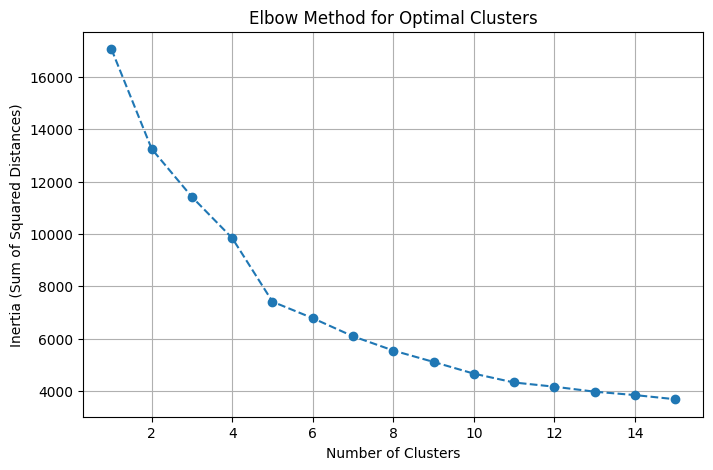

In [90]:
determine_optimal_clusters(X_scaled, max_clusters=15)

In [62]:
df_clustered.to_csv("Behavioural_6c.csv")

In [55]:
df_clustered

,person_id,Op_30,Op_365,ED_30,ED_365,Ip_30,Ip_365,Cluster
0,E223702,0.0,4.0,0.0,0.0,0.0,0.0,1
1,E371944,3.0,11.0,0.0,0.0,0.0,0.0,0
2,E435319,1.0,2.0,0.0,0.0,0.0,0.0,0
3,E475126,2.0,2.0,0.0,0.0,0.0,0.0,0
4,E494826,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...
2432,E994516,0.0,0.0,0.0,0.0,0.0,0.0,1
2433,E994965,2.0,16.0,0.0,0.0,0.0,0.0,0
2434,E99509,1.0,5.0,0.0,0.0,0.0,0.0,0
2435,E99554,1.0,2.0,0.0,0.0,0.0,0.0,0


In [96]:
df_melted = df_clustered.melt(id_vars=['person_id', 'Cluster'], 
                    value_vars=['Op_30', 'Op_365', 'ED_30', 'ED_365', 'Ip_30', 'Ip_365','No_of_surgeries'],
                    var_name='Metric', value_name='Value')

# Count non-zero patients per cluster and metric
result = (
    df_melted[df_melted['Value'] > 0]  # Filter non-zero values
    .groupby(['Metric', 'Cluster'])['person_id']
    .count()  # Count unique patient IDs
    .unstack(fill_value=0)  # Reshape with clusters as columns
)

# Display the result
print(result)

Cluster            0     1
Metric                    
ED_30             57   204
ED_365           113   520
Ip_30            191     0
Ip_365           378    45
No_of_surgeries  305   327
Op_30            203  1066
Op_365           315  1756


In [97]:
result

Cluster,0,1
Metric,,
ED_30,57,204
ED_365,113,520
Ip_30,191,0
Ip_365,378,45
No_of_surgeries,305,327
Op_30,203,1066
Op_365,315,1756


In [54]:
df

,person_id,T1D,T2D,LIVER_MILD,LIVER,AIDS,MALIG,METAS,DIAB_CHRO,DEMENTIA,...,Hip prosthesis,Abdominal hysterectomy,Knee prosthesis,Laminectomy,Kidney surgery,Ovarian surgery,Pacemaker surgery,Peripheral vascular bypass surgery,Exploratory laparotomy,Cluster
0,E223702,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,E371944,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,E435319,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,E475126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,E494826,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,E994516,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2433,E994965,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2434,E99509,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2435,E99554,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2


In [15]:
df_2=pd.read_csv("Behavioural.csv")

In [58]:
df_2.to_csv("Behavioural.csv")

In [65]:
df_2=df_clustered.merge(df[["person_id",'Cluster']],on="person_id",how="left")

In [69]:
df_2["Cluster_y"].value_counts()

Cluster_y
0    611
3    518
4    515
1    386
2    294
5    113
Name: count, dtype: int64

In [70]:
df_melted = df_2.melt(id_vars=['person_id', 'Cluster_y'], 
                    value_vars=['Op_30', 'Op_365', 'ED_30', 'ED_365', 'Ip_30', 'Ip_365',"No_of_surgeries"],
                    var_name='Metric', value_name='Value')

# Count non-zero patients per cluster and metric
result = (
    df_melted[df_melted['Value'] > 0]  # Filter non-zero values
    .groupby(['Metric', 'Cluster_y'])['person_id']
    .count()  # Count unique patient IDs
    .unstack(fill_value=0)  # Reshape with clusters as columns
)

# Display the result
print(result)

Cluster_y          0    1    2    3    4   5
Metric                                      
ED_30             85   43   27   54   42  10
ED_365           161  108   82  146  109  27
Ip_30             65   27   18   47   26   8
Ip_365           108   63   60  100   67  25
No_of_surgeries  151   89   73  173  120  26
Op_30            321  234  149  251  257  57
Op_365           459  359  257  440  462  94


In [71]:
result

Cluster_y,0,1,2,3,4,5
Metric,,,,,,
ED_30,85,43,27,54,42,10
ED_365,161,108,82,146,109,27
Ip_30,65,27,18,47,26,8
Ip_365,108,63,60,100,67,25
No_of_surgeries,151,89,73,173,120,26
Op_30,321,234,149,251,257,57
Op_365,459,359,257,440,462,94
